# Statsmodel

1. trend
2. seasonality
3. cyclic

In [4]:
import numpy as np
import pandas as pd

In [5]:
dftest = pd.read_csv('Data/macrodata.csv')

In [6]:
dftest.head()

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [7]:
df = pd.read_csv('Data/macrodata.csv', index_col = 0, parse_dates = True)

In [8]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [9]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [10]:
df.shape

(203, 14)

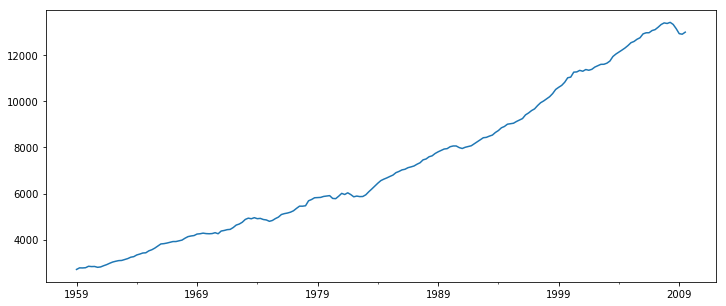

In [11]:
df['realgdp'].plot(figsize=(12,5));

the graph looks like its going upwards, but due to 2009 recession its going down

use statsmodel to get the trend !

hodrick-prescott filter is a statsmodel technique that separates out a time series into a TREND and a CYCLICAL components.

> lambda value for hpfilter will depend on data frequency. 

    1. for quaterly data, lamb = 1600   [default]
    2. for annual data, lamb = 6.25     (1600 / 4**4)
    3. for monthly data, lamb = 129600  (1600 * 3**4)
 
> hpfilter returns a TUPLE, so use tuple-unpacking <i>(remember from functions datacamp that how returned tuples are opened)     

In [12]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [14]:
#tuple unpacking of returned tuple

gdp_cycle , gdp_trend = hpfilter(df['realgdp'], lamb=1600)  #we've quaterly data

In [15]:
type(gdp_trend)

pandas.core.series.Series

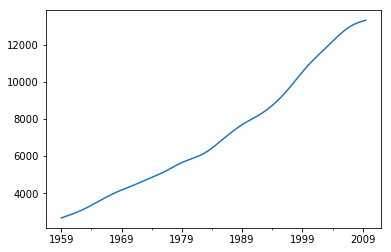

In [16]:
#we'll learn about time series decomposing later in ETS decomposition

#this shows the GENERALISED TREND IN OUR DATA
gdp_trend.plot();

to compare this trend with original gdp data. we add the gdp_trend to our df as a column.

then we'll plot gdp_trend & realgdp on the same plot and see them wrt each other

In [17]:
df['gdp_trend'] = gdp_trend

In [18]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


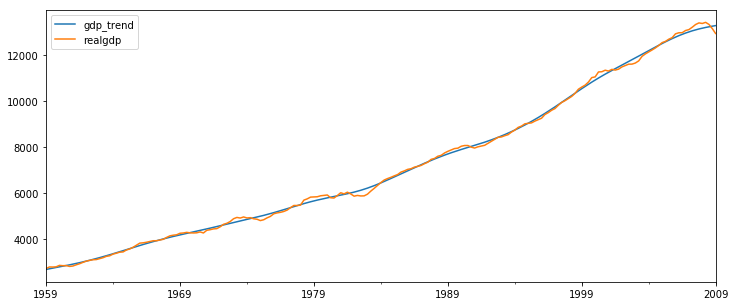

In [23]:
df[ ['gdp_trend', 'realgdp'] ].plot(figsize=(12,5), xlim=['1959','2009']);

the above plot allows us to see where the realvalue is above or below the general trend.

> to zoom in to certain range of years, use xlim !

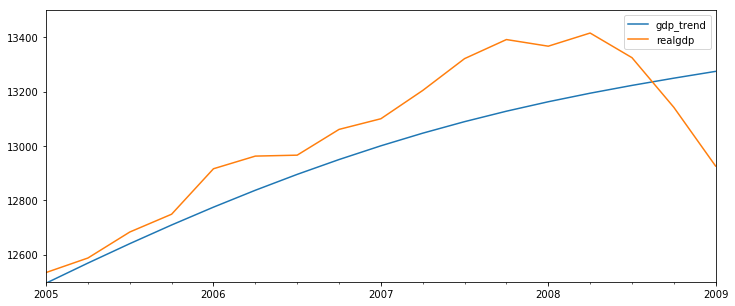

In [31]:
#to see the recent regression trend closely i zoomed in to 2005 to 2009 

#you can also use slice operator, its easier when you dont exactly know the start or the end

df[ ['gdp_trend', 'realgdp'] ].plot(figsize=(12,5), xlim=['2005','2009'], ylim=[12500, 13500]);

In [32]:
#so we can see that the great recession actually began in first quarter of 2008